### Importing libraries

In [33]:
from IPython.display import Image
%matplotlib inline
import pandas as pd
from io import StringIO
import os
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from math import sqrt
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import xgboost as xgb
import numpy as np
from xgboost import XGBClassifier

In [4]:
data = pd.read_csv('avocado.csv')
data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [6]:
data.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


### Dealing with missing data

In [7]:
data.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [8]:
data = data.dropna()
data.head(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


### SubPlots

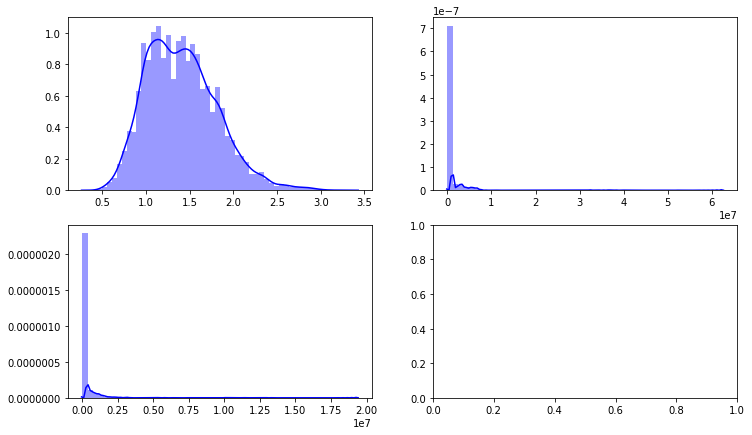

In [9]:
# Set up the matplotlib figure
fig, axes = plt.subplots(2, 2, figsize=(12, 7))

a = data['AveragePrice'].values
b = data['Total Volume'].values
c = data['Total Bags'].values


# plot 1

sns.distplot(a, color = 'blue', ax=axes[0,0])
axes[0,0].set_title = 'Total Bill'

# plot 2
sns.distplot(b, color = 'blue', ax=axes[0,1])

# plot 3
sns.distplot(c, color = 'blue', ax=axes[1,0])

### Train Test split

In [26]:
# declare our target and features
features = ["Total Volume","Total Bags","4046","4225","4770"]
target = ['AveragePrice']

In [27]:
X = data[features]
y = data[target]

In [28]:
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [29]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [30]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

In [31]:
# Compute the rmse by invoking the mean_sqaured_error function from sklearn's metrics module.
rmse = np.sqrt(mean_squared_error(y_test, preds))
#print("RMSE: %f" % (rmse))
print(rmse)

0.45004175655335527


Mean target value: AveragePrice    1.405978
dtype: float64


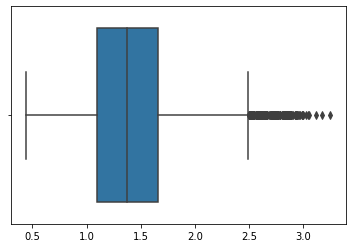

In [37]:
# Is it any good?
print('Mean target value: ' + str(np.mean(data[target])))
import seaborn as sns
sns.boxplot(data[target])
plt.rcParams['figure.figsize'] = [12, 2]

## k-fold Cross Validation using XGBoost

train-rmse-mean    0.390725
train-rmse-std     0.001735
test-rmse-mean     0.392326
test-rmse-std      0.004607
dtype: float64

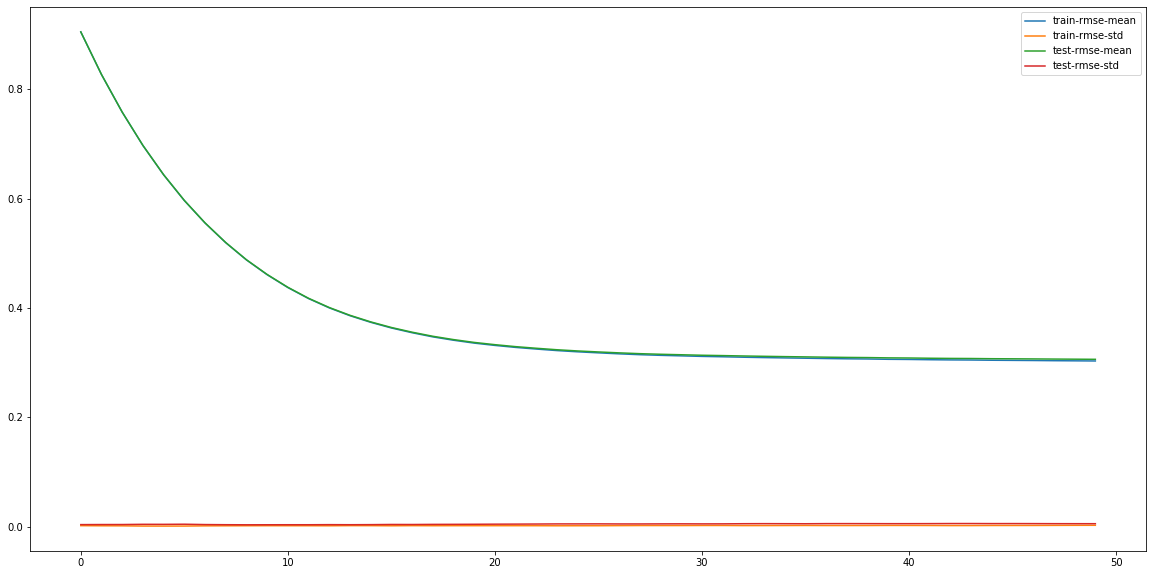

In [43]:
data_dmatrix = xgb.DMatrix(data=X,label=y)
params = {'objective':'reg:squarederror','colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)
# num_boost_round - Number of times to run cross-validation

# cv_results contains train and test RMSE metrics for each boosting round.

display(cv_results.mean())
cv_results.plot()
plt.rcParams['figure.figsize'] = [20, 5]

In [44]:
cv_results.shape

(50, 4)

In [45]:
print((cv_results["test-rmse-mean"]).tail(1))

49    0.30607
Name: test-rmse-mean, dtype: float64



## Visualize Boosting Trees and Feature Importance


In [51]:

# # You can also visualize individual trees from the fully boosted model that XGBoost creates using the entire 
# # housing dataset. XGBoost has a plot_tree() function that makes this type of visualization easy. 
# # Once you train a model using the XGBoost learning API, you can pass it to the plot_tree() function 
# # along with the number of trees you want to plot using the num_trees argument.

# xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)
# # Plotting the first tree with the matplotlib library:

# import matplotlib.pyplot as plt

# xgb.plot_tree(xg_reg,num_trees=0)
# plt.rcParams['figure.figsize'] = [10, 15]
# plt.show()

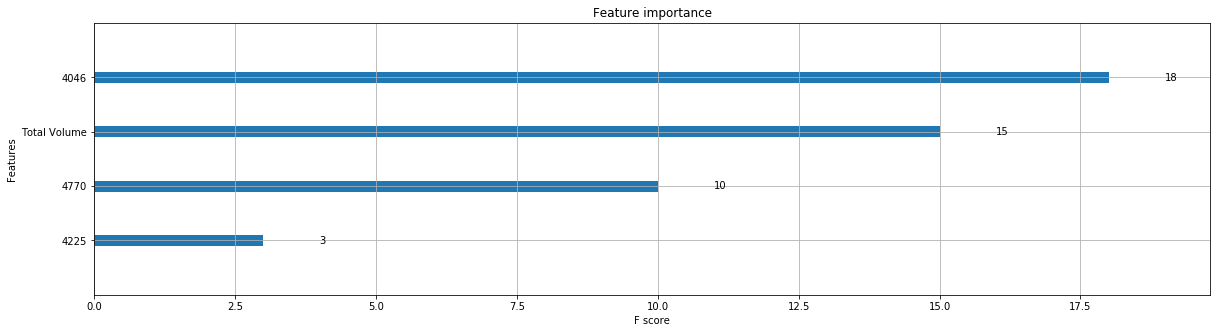

In [47]:
# Another way to visualize your XGBoost models is to examine the importance of each feature column in the 
# original dataset within the model.

# One simple way of doing this involves counting the number of times each feature is split on across 
# all boosting rounds (trees) in the model, and then visualizing the result as a bar graph, 
# with the features ordered according to how many times they appear. XGBoost has a plot_importance() 
# function that allows you to do exactly this.

xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()
# As you can see the feature RM has been given the highest importance score among all the features. 
# Thus XGBoost also gives you a way to do Feature Selection. Isn't this brilliant?